# <font color='orange'>COMP 306/406</font> &mdash; Problem Set 3 &mdash; <font color='teal'>Programming Assignment</font>


## Instructions
* Any use of generative AI tools must be acknowledged and include the complete transcript of the conversation.  

* You are expected to abide by the Loyola University student's code of conduct and any other policies outlined in the syllabus.

* Make a copy of this notebook in your personal Google drive, then proceed with running the notebook.

* Run all the cells in the notebook.

# Dimensionality Reduction using PCA, tSNE and UMAP

In [2]:
import numpy as np
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
mnist_df = (
    load_digits(as_frame=True)
    .frame
    .rename(columns={'target': 'class_label'})
)
mnist_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


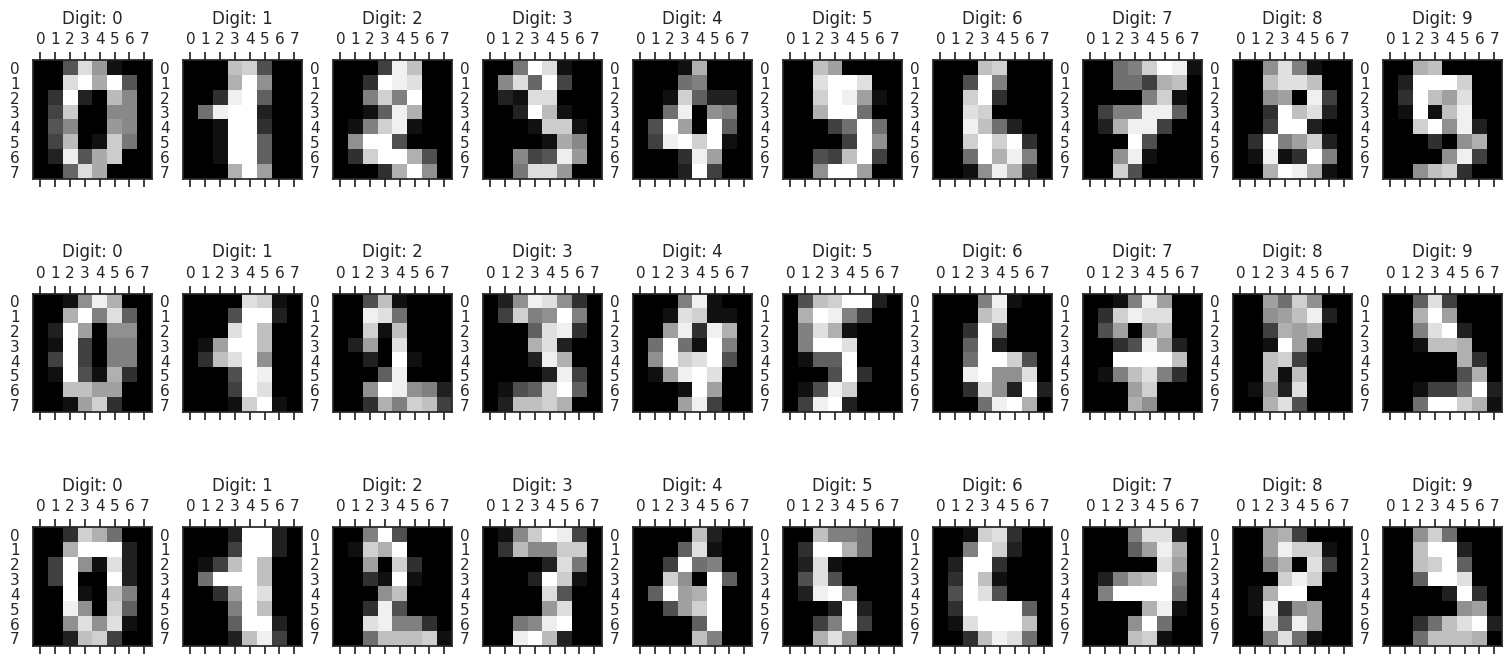

In [4]:
# Plot the first 30 rows. Each row has (8 x 8) = 64 pixels
fig, axs = plt.subplots(nrows=3, ncols=10, figsize=(15,7), layout='constrained')
axs = axs.flatten()
plt.gray()
for i, ax in enumerate(axs):
    ax.set_title(f'Digit: {mnist_df.class_label[i]}')
    (
        ax.matshow(
            mnist_df.iloc[i, :-1]
            .values
            .reshape((8, 8))
            .astype(float)
        )
    )
    ax.grid(False);

## PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
def plot_mnist_scatter(
        data,
        c,
        name,
        ax=None,
    ):
    if ax is None:
        ax = plt.gca()

    cmap = plt.get_cmap('Spectral', 10)
    x, y = data[:, 0], data[:, 1]

    sc = ax.scatter(
        x=x, y=y, c=c, cmap=cmap,
        edgecolors='black', s=30,
        alpha=0.90,
    );
    plt.colorbar(sc);
    ax.set_aspect('equal', 'datalim');
    ax.set_title(name);

    return ax

In [7]:
X = mnist_df.iloc[:, :-1]   # all the rows, all columns except the last one
y = mnist_df.iloc[:, -1].astype(int)    # just the last column with class labels

In [8]:
pca = PCA()   # keep all components
pca.fit(X)

PCA()

In [9]:
pca.explained_variance_ratio_[: 10]  # stores the explained variances by all the components

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806])

In [10]:
cumulative_x = np.cumsum(pca.explained_variance_ratio_)  # cumulative sum

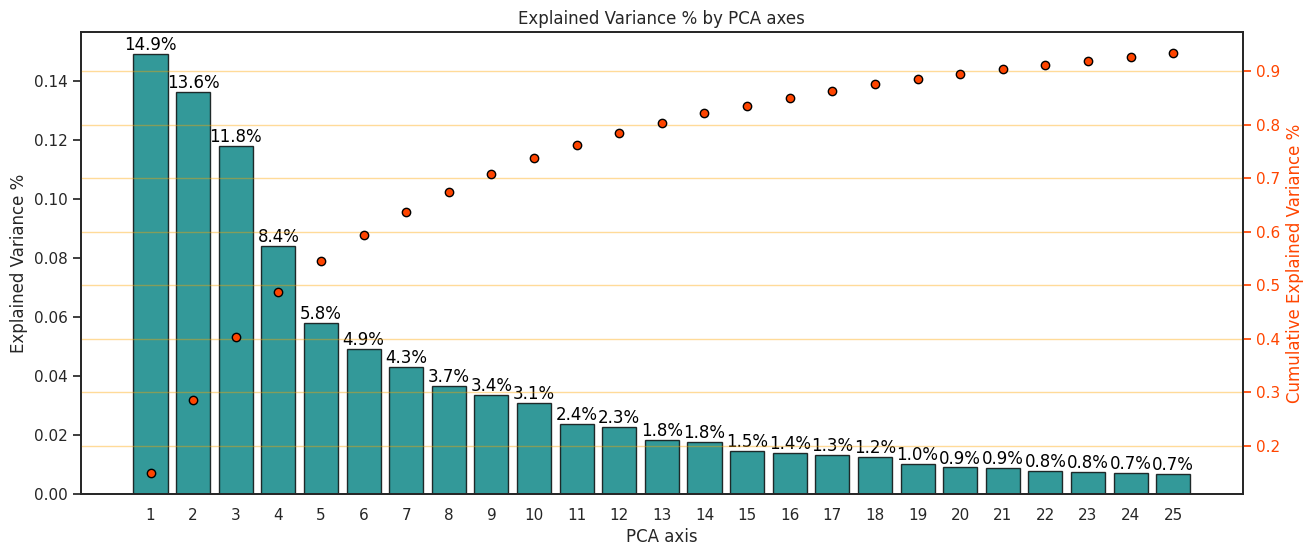

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))
top_k = 25


bars = ax.bar(
    x=range(1, top_k+1), height=pca.explained_variance_ratio_[: top_k],
    color='teal', alpha=0.8, edgecolor='black',
);

ax.bar_label(
    bars, fmt='{:.1%}', label_type='edge', color='black',
);

ax.set_title('Explained Variance % by PCA axes');
ax.set(
    xlabel='PCA axis',
    ylabel='Explained Variance %',
);
ax.set_xticks(ticks=range(1, top_k+1));
ax.grid(False);

## plot the cumulative explained variance % on the second Y axis
ax2 = ax.twinx();
ax2.scatter(
    x=range(1, top_k+1), y=cumulative_x[: top_k], label='cumulative',
    color='orangered', edgecolor='black',
);
ax2.set_ylabel('Cumulative Explained Variance %', fontdict={'color': 'orangered'});
ax2.tick_params(axis='y', colors='orangered');
ax2.grid(alpha=0.4, c='orange');

Let's plot the first two PCA components

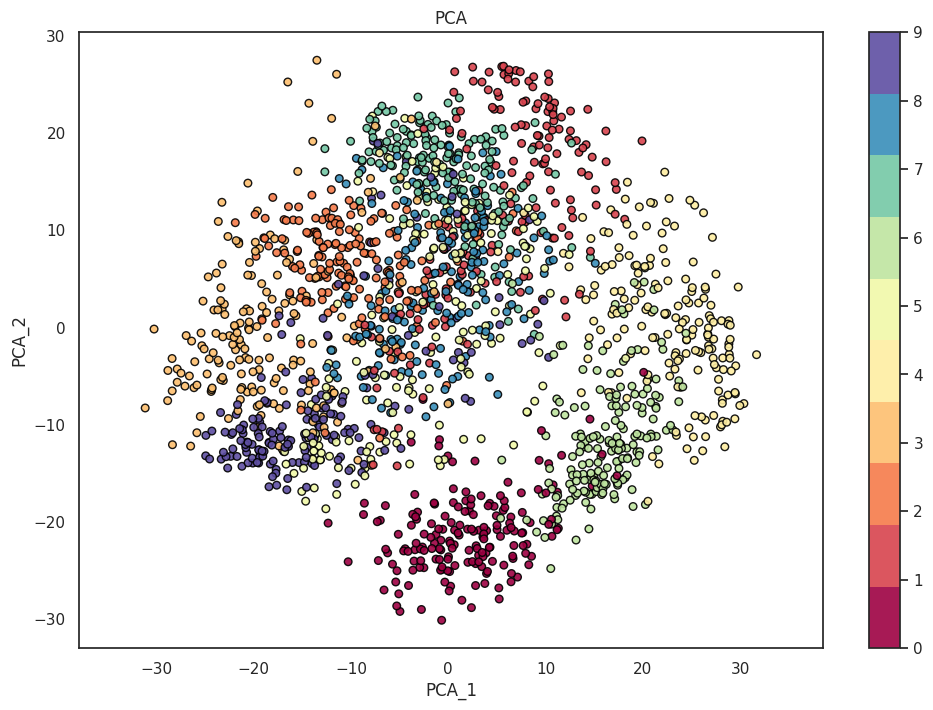

In [12]:
pca_X = PCA(n_components=2).fit_transform(X)

fig, ax = plt.subplots(figsize=(12, 8));
plot_mnist_scatter(data=pca_X, c=y, name='PCA');
ax.set(
    xlabel='PCA_1',
    ylabel='PCA_2',
);

## <font color="salmon" size="+3"> **Q1**: PCA plot. </font> [2 points]
Generate a plot with two panels where:
* The `left` panel has `x` as PCA axis 1, `y` as PCA axis 2
* The `right` panel has `x` as PCA axis 1, `y` as PCA axis 3
* The overall figure should be `14 x 6`.
* Points corresponding to the individual digits must use different colors. The colors should be explained via a colorbar, and be consistent across the two panels.


You may use the `plot_mnist_scatter` function in your answer.

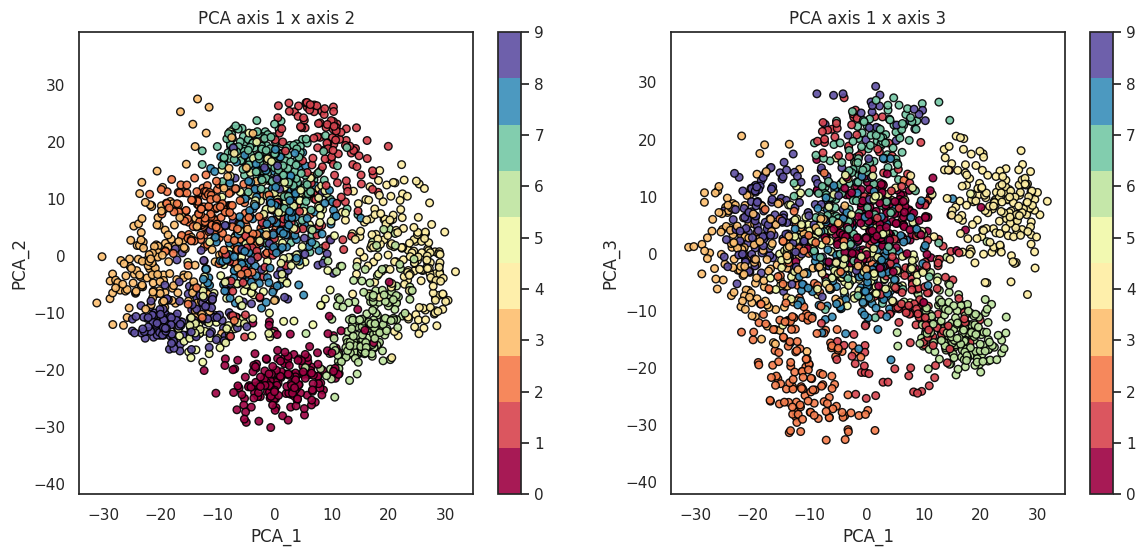

In [13]:
## your answer here
pca_X = PCA(n_components=2).fit_transform(X)
pca_Y = PCA(n_components=3).fit_transform(X)

fig, axs = plt.subplots(figsize=(14,6),ncols=2);
plot_mnist_scatter(data=pca_X[:, :2], c=y, name='PCA axis 1 x axis 2',ax=axs[0]);
axs[0].set(
    xlabel='PCA_1',
    ylabel='PCA_2',
);
plot_mnist_scatter(data=pca_Y[:, [0,2]], c=y, name='PCA axis 1 x axis 3', ax=axs[1]);
axs[1].set(
    xlabel='PCA_1',
    ylabel='PCA_3',
);

## Comparing PCA, tSNE, and UMAP embeddings

In [14]:
from sklearn.manifold import TSNE
from umap import UMAP

In [15]:
pca_X = PCA(n_components=2).fit_transform(X)
tsne_X = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=21).fit_transform(X)
umap_X = UMAP(n_components=2, random_state=21, n_neighbors=15).fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


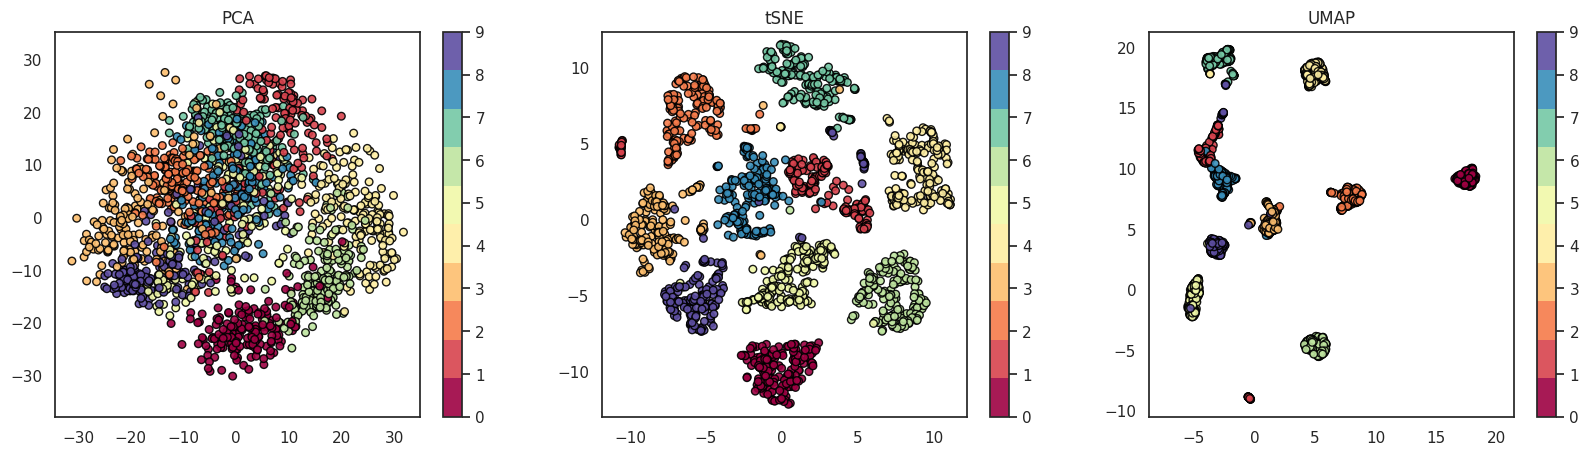

In [16]:

fig, axs = plt.subplots(figsize=(20, 5), ncols=3);

plot_mnist_scatter(data=pca_X, c=y, name='PCA', ax=axs[0]);
plot_mnist_scatter(data=tsne_X, c=y, name='tSNE', ax=axs[1]);
plot_mnist_scatter(data=umap_X, c=y, name='UMAP', ax=axs[2]);

## <font color="salmon" size="+3"> **Q2** Combining PCA and tSNE. </font> [2 points]

Generate a plot with two panels where:
* The `left` panel has shows `tSNE` embeddings on the whole dataset. The title should be `tSNE whole`.

* The `right` panel shows `tSNE` embeddings on the **first 10 PCA** components.
* The overall figure should be `14 x 6`.

* Points corresponding to the individual digits must use different colors. The colors should be explained via a colorbar, and be consistent across the two panels.

You may use the `plot_mnist_scatter` function in your answer.

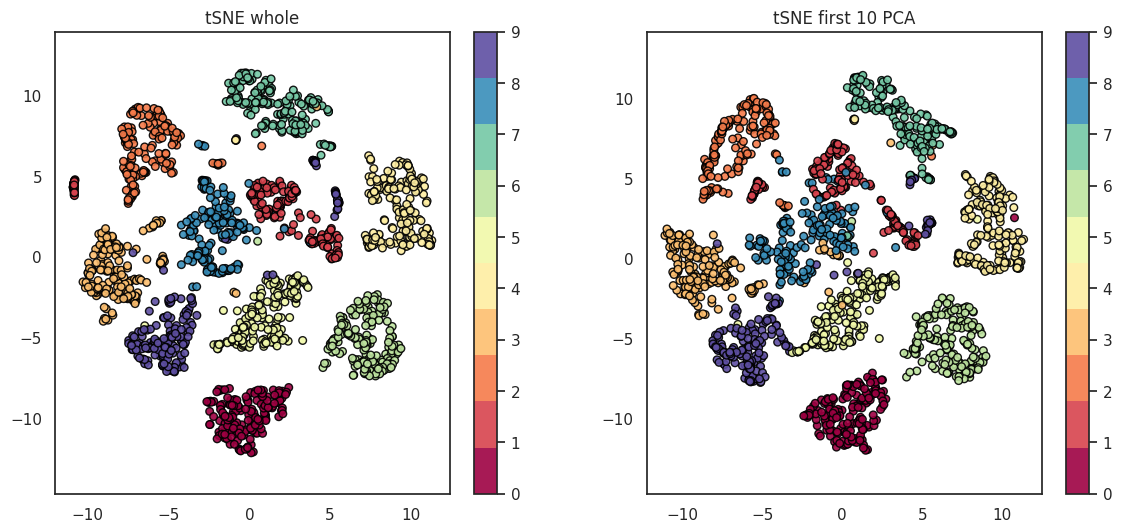

In [17]:
## your answer here
# tSNE embeddings on the whole dataset
pca_left = PCA(n_components=25).fit_transform(X)
tsne_left = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=21).fit_transform(pca_left)
# tSNE embeddings on the first 10 PCA components.
pca_right = PCA(n_components=10).fit_transform(X)
tsne_right= TSNE(n_components=2, perplexity=30, max_iter=300, random_state=21).fit_transform(pca_right)

fig, axs = plt.subplots(figsize=(14,6),ncols=2);
plot_mnist_scatter(data=tsne_left, c=y, name='tSNE whole', ax=axs[0]);
plot_mnist_scatter(data=tsne_right, c=y, name='tSNE first 10 PCA', ax=axs[1]);


## <font color="salmon" size="+3"> **Q3** Tuning UMAP parameters. </font> [1 point]

`UMAP` has two parameters of interest:
* `n_neighbors` which controls for the size of the neighborhoods around points, and
* `min_dist` that controls for the minimum distance between points in low dimensional space

Generate a plot with two panels where:
* The `left` panel has shows `UMAP` embeddings with the default parameters. The title should be `UMAP default`.

* The `right` panel shows `UMAP` embeddings with modified `min_dist` and `n_neighbors` parameters that produce points that makes the points in a cluster slightly more spread out.

* The overall figure should be `14 x 6`.

* Points corresponding to the individual digits must use different colors. The colors should be explained via a colorbar, and be consistent across the two panels.

You may use the `plot_mnist_scatter` function in your answer.

One possible output is given below. The spread of points in your response may look different.

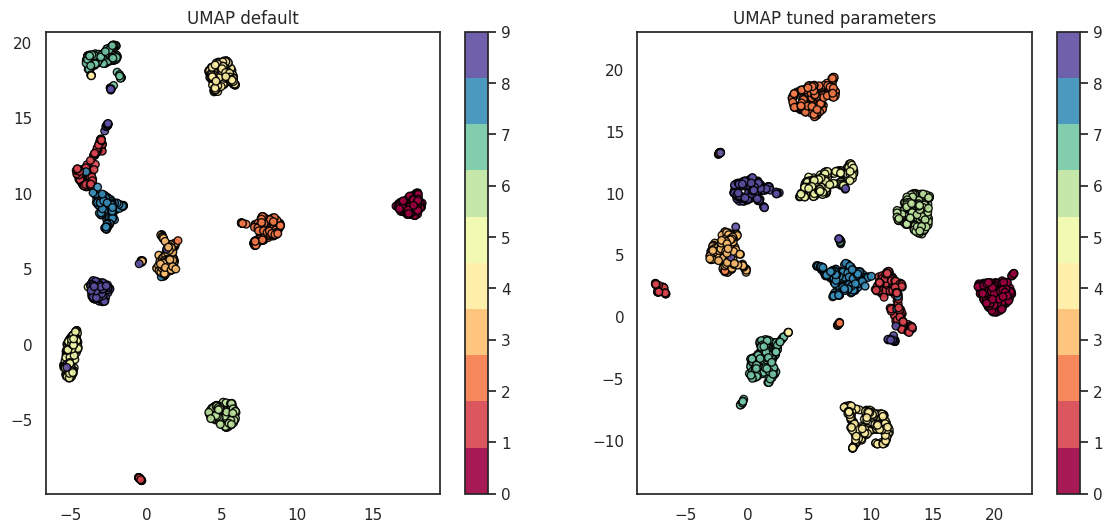

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


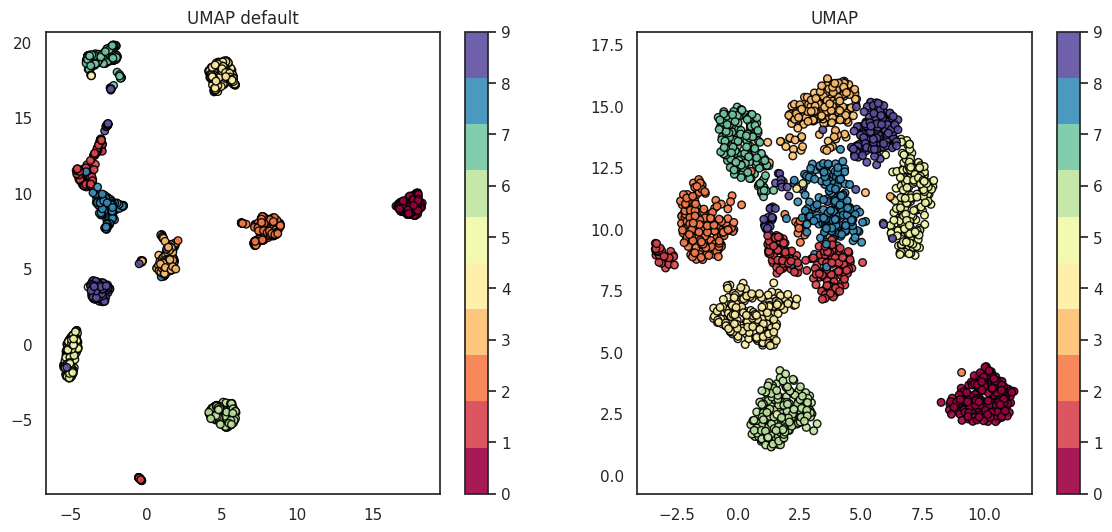

In [18]:
## your answer here
umap_left = UMAP(n_components=2, random_state=21, n_neighbors=15).fit_transform(X)
umap_right = UMAP(n_components=2, random_state=21, n_neighbors=100,min_dist=0.5).fit_transform(X)

fig, axs = plt.subplots(figsize=(14,6),ncols=2);
plot_mnist_scatter(data=umap_left, c=y, name='UMAP default', ax=axs[0]);
plot_mnist_scatter(data=umap_right, c=y, name='UMAP', ax=axs[1]);

--------------

# Frequent Pattern Mining

In [19]:
files = "https://raw.githubusercontent.com/satyakisikdar/COMP306-DM-Fa24/main/PS4/retail-dataset.pickle"
!wget $files

--2025-03-16 22:05:22--  https://raw.githubusercontent.com/satyakisikdar/COMP306-DM-Fa24/main/PS4/retail-dataset.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 624382 (610K) [application/octet-stream]
Saving to: ‘retail-dataset.pickle’

retail-dataset.pick 100%[===================>] 609.75K  --.-KB/s    in 0.05s   

2025-03-16 22:05:22 (11.3 MB/s) - ‘retail-dataset.pickle’ saved [624382/624382]



## Data Exploration with Pandas, Matplotlib, and Seaborn

### Step 0: load the libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

pd.options.display.max_colwidth = 100
sns.set_style('whitegrid')  # adds grid lines
sns.set_theme('talk')       # makes the fonts larger

Helpful references:
* [Pandas tutorial](https://www.datacamp.com/tutorial/pandas)
* [Seaborn tutorial](https://seaborn.pydata.org/tutorial/introduction.html)
* [Pandas visualization tutorial](https://realpython.com/pandas-plot-python/)
* [`mlxtend` library](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)

# Step 0: Load the dataset

We'll load the dataset from the pickle file.
It is a list of lists, where each transaction is a separate list of items (strings)

In [21]:
## load the retail dataset
dataset = (
    pickle
    .load(
        open('./retail-dataset.pickle', 'rb')
    )
)
print(dataset[: 5])  # print the first 10 transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']]


In [22]:
## How many transactions do we have? Nearly 10k
print(len(dataset))

9835


# Step 1: Convert the dataset into a pandas DataFrame
We will use the `mlextend` library's `TransactionEncoder` method

In [23]:
te = TransactionEncoder()          # initialize the transaction encoder object

transactions_df = pd.DataFrame(
    te.fit_transform(dataset),     # fit the dataset
    columns=te.columns_,           # use column names
)
transactions_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## <font color='salmon' size='+3'>Q4: Data Exploration </font> [1 point]

---
### <font color='salmon' size='+2'> (a) How many unique items do we have in the dataset? </font> [0.25 points]


there are 169 unique items, represented by the number of columns

### <font color='salmon' size='+2'>(b) What are the 10 most frequent items bought and what are their counts? </font> [0.25 points]

* Remember, each transaction is a separate row, and the value in the cell `[i, j]` is True if transaction `i` has item `j`.
* *Hint: you can use the `sum` method on boolean columns!*

In [24]:
# get the counts of all the items
data =[]
for col in transactions_df.columns:
    sumCol = transactions_df[col].sum()
    data.append([col, sumCol])
#create a separate dataframe called df to store counts and column names
df = pd.DataFrame(data)

# find the 10 more frequent items bought and their counts
highest_10 = df.nlargest(10, 1)
print(highest_10)


                    0     1
166        whole milk  2513
103  other vegetables  1903
123        rolls/buns  1809
139              soda  1715
167            yogurt  1372
13      bottled water  1087
124   root vegetables  1072
158    tropical fruit  1032
134     shopping bags   969
131           sausage   924


### <font color='salmon' size='+2'>(e) What's the `average`, `min`, `max`, and `median` length of transactions? </font> [0.5 points]

* Remember, each transaction is a separate row, and the value in the cell `[i, j]` is True if transaction `i` has item `j`.
* *Hint: first count the number of items in each transaction and then use the `describe` method

In [25]:
transactions_df.sum(axis=1).describe()

,0
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


The average transaction is 4.4 items.

The min transaction is 1 item.

The max transaction is 32 items.

The median transaction is 2 items.

# Step 2: Finding frequent itemsets using Apriori Algorithm

In [26]:
# use the apriori method to find frequent patterns
min_support = 0.002

freq_itemsets = apriori(
    transactions_df,            # name of the dataframe
    min_support=min_support,    # Min support threshold (fraction)
    use_colnames=True,          # add names of itemsets
    verbose=True,
)

## we can add the length of the itemsets as a column
freq_itemsets = (
    freq_itemsets
    .assign(
        length=lambda df_: df_.itemsets.apply(len),  # apply the len function
    )
)
freq_itemsets

Processing 18 combinations | Sampling itemset size 6


,support,itemsets,length
0,0.008033,(Instant food products),1
1,0.033452,(UHT-milk),1
2,0.003559,(abrasive cleaner),1
3,0.003254,(artif. sweetener),1
4,0.017692,(baking powder),1
...,...,...,...
4218,0.002542,"(whole milk, tropical fruit, yogurt, other vegetables, rolls/buns)",5
4219,0.003559,"(whole milk, tropical fruit, yogurt, other vegetables, root vegetables)",5
4220,0.002339,"(whole milk, whipped/sour cream, yogurt, other vegetables, root vegetables)",5
4221,0.002440,"(whole milk, whipped/sour cream, tropical fruit, yogurt, other vegetables)",5


Frequent Itemsets can also be found using the FP-Growth algorithm

In [27]:
# use the FP-growth method to find frequent patterns
min_support = 0.01

freq_itemsets = fpgrowth(
    transactions_df,            # name of the dataframe
    min_support=min_support,    # Min support threshold (fraction)
    use_colnames=True,          # add names of itemsets
    verbose=True,
)

## we can add the length of the itemsets as a column
freq_itemsets = (
    freq_itemsets
    .assign(
        length=lambda df_: df_.itemsets.apply(len),  # apply the len function
    )
)
freq_itemsets

88 itemset(s) from tree conditioned on items ()
9 itemset(s) from tree conditioned on items (citrus fruit)
0 itemset(s) from tree conditioned on items (citrus fruit, whole milk)
1 itemset(s) from tree conditioned on items (citrus fruit, yogurt)
0 itemset(s) from tree conditioned on items (citrus fruit, tropical fruit)
0 itemset(s) from tree conditioned on items (citrus fruit, bottled water)
1 itemset(s) from tree conditioned on items (citrus fruit, other vegetables)
1 itemset(s) from tree conditioned on items (citrus fruit, root vegetables)
0 itemset(s) from tree conditioned on items (citrus fruit, sausage)
0 itemset(s) from tree conditioned on items (citrus fruit, rolls/buns)
0 itemset(s) from tree conditioned on items (citrus fruit, soda)
7 itemset(s) from tree conditioned on items (margarine)
0 itemset(s) from tree conditioned on items (margarine, other vegetables)
0 itemset(s) from tree conditioned on items (margarine, whole milk)
0 itemset(s) from tree conditioned on items (margar

,support,itemsets,length
0,0.082766,(citrus fruit),1
1,0.058566,(margarine),1
2,0.017692,(semi-finished bread),1
3,0.139502,(yogurt),1
4,0.104931,(tropical fruit),1
...,...,...,...
328,0.010168,"(frozen vegetables, rolls/buns)",2
329,0.012405,"(yogurt, frozen vegetables)",2
330,0.014235,"(other vegetables, onions)",2
331,0.012100,"(whole milk, onions)",2


## <font color='salmon' size='+3'>Q5: Frequent Itemsets (2 points total)

---
### <font color='salmon' size='+2'>(a) List the top 5 most-frequent itemsets of lengths 1, 2, and 3 </font> [0.75 points]
* Use the `support` column to find the most frequent itemsets in each case


In [28]:
# length 1
one = freq_itemsets[ (freq_itemsets['length'] == 1) ]
most_frequent_itemset_one = one.sort_values(by='support', ascending=False).iloc[0]
print(most_frequent_itemset_one)

# length 2
two = freq_itemsets[ (freq_itemsets['length'] == 2) ]
most_frequent_itemset_two = two.sort_values(by='support', ascending=False).iloc[0]
print(most_frequent_itemset_two)

# length 3
three = freq_itemsets[ (freq_itemsets['length'] == 3) ]
most_frequent_itemset_three = three.sort_values(by='support', ascending=False).iloc[0]
print(most_frequent_itemset_three)

support         0.255516
itemsets    (whole milk)
length                 1
Name: 6, dtype: object
support                           0.074835
itemsets    (whole milk, other vegetables)
length                                   2
Name: 146, dtype: object
support                                            0.023183
itemsets    (whole milk, other vegetables, root vegetables)
length                                                    3
Name: 244, dtype: object


### <font color='salmon' size='+2'>(b) Plot the number of frequent itemsets found vs. `min_support` as a line plot with markers. </font> [1 point]

* The plot should have two panels, the left panel with linear scale on the Y axis, and the right panel with log scale on the Y axis.

* *Hint: you have to run `apriori` to get the count of frequent itemsets. [subplots in matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)*

Text(0.5, 1.0, 'log scale')

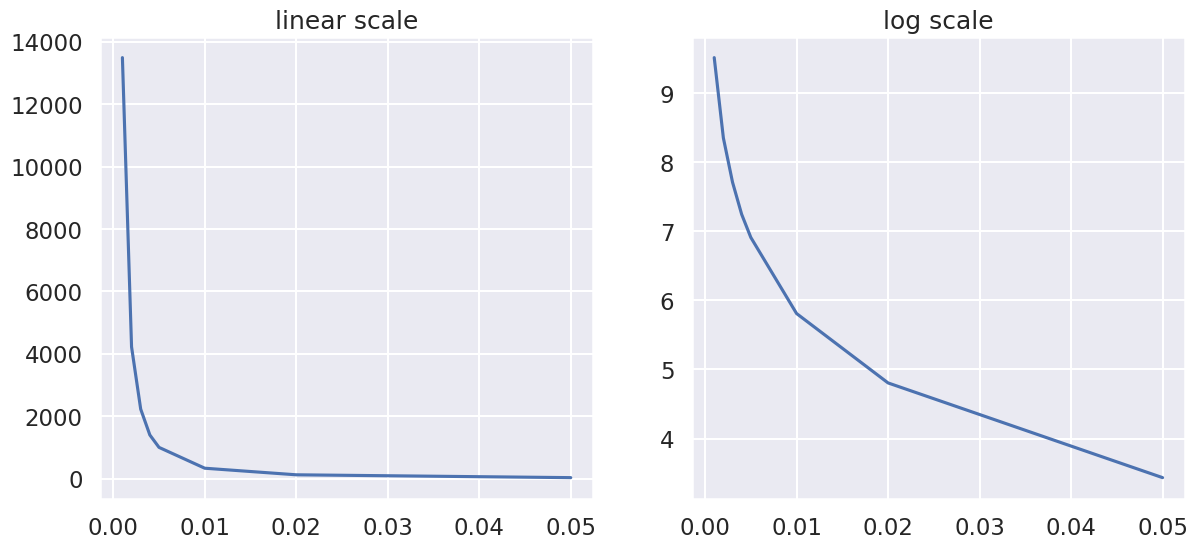

In [29]:
import math
min_supports = [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.05]

freq_itemset_counts = []  # store the frequent itemset counts here
for min_support in min_supports:
    freq_itemsets = apriori(transactions_df,min_support=min_support,use_colnames=True)
    freq_itemset_counts.append(len(freq_itemsets))

log_freq_itemset_counts = [math.log(x) for x in freq_itemset_counts]

## make the plot here
## left: y-axis: linear scale (default);  right: y-axis: log scale
fig, (ax1,ax2) = plt.subplots(figsize=(14, 6), ncols=2);
# left
ax1.plot(min_supports, freq_itemset_counts)
ax1.set_title('linear scale')
# right
ax2.plot(min_supports, log_freq_itemset_counts)
ax2.set_title('log scale')

### <font color='salmon' size='+2'>(c) Write 1-2 sentences describing your findings from the plot. </font> [0.25 points]

As you increase the min_support you decrease the frequency counts of the itemsets and it is a logarithmic change, so the the decrease of frequency counts is at a logarithmic rate which is very step change.

# Step 3: Mining association rules
* We can mine association rules using the `association_rules` method from mlxtend

In [30]:
# get frequent itemsets
min_support = 0.002             # support of 0.2%

freq_itemsets = apriori(
    transactions_df,            # name of the dataframe
    min_support=min_support,    # Min support threshold (fraction)
    use_colnames=True,          # add names of itemsets
    verbose=True,
)

# mine association rules
rules = association_rules(
    freq_itemsets,
    metric='confidence',         # specify a metric: support/confidence/lift
    min_threshold=0.1,           # specify a minimum threshold
)
rules

Processing 18 combinations | Sampling itemset size 6


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Instant food products),(hamburger meat),0.008033,0.033249,0.003050,0.379747,11.421438,1.0,0.002783,1.558640,0.919834,0.079787,0.358415,0.235745
1,(Instant food products),(other vegetables),0.008033,0.193493,0.002745,0.341772,1.766332,1.0,0.001191,1.225271,0.437368,0.013811,0.183854,0.177980
2,(Instant food products),(rolls/buns),0.008033,0.183935,0.002339,0.291139,1.582838,1.0,0.000861,1.151235,0.371205,0.012332,0.131367,0.151927
3,(Instant food products),(whole milk),0.008033,0.255516,0.003050,0.379747,1.486196,1.0,0.000998,1.200291,0.329790,0.011710,0.166868,0.195842
4,(UHT-milk),(bottled water),0.033452,0.110524,0.007321,0.218845,1.980074,1.0,0.003624,1.138668,0.512099,0.053571,0.121781,0.142541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,"(tropical fruit, yogurt, rolls/buns)","(whole milk, root vegetables)",0.008744,0.048907,0.002237,0.255814,5.230624,1.0,0.001809,1.278031,0.815953,0.040367,0.217547,0.150776
9965,"(tropical fruit, yogurt, root vegetables)","(whole milk, rolls/buns)",0.008134,0.056634,0.002237,0.275000,4.855700,1.0,0.001776,1.301194,0.800568,0.035772,0.231475,0.157249
9966,"(tropical fruit, rolls/buns, root vegetables)","(whole milk, yogurt)",0.005897,0.056024,0.002237,0.379310,6.770449,1.0,0.001907,1.520850,0.857355,0.037479,0.342473,0.209619
9967,"(yogurt, rolls/buns, root vegetables)","(whole milk, tropical fruit)",0.007219,0.042298,0.002237,0.309859,7.325637,1.0,0.001932,1.387691,0.869772,0.047312,0.279378,0.181372


So we find 460 rules with a minimum confidence threshold of `0.1`.

* `antecedents` are itemsets on the left hand side of a rule
* `consequents` are itemsets on the right hand side of a rule


## <font color='salmon' size='+3'>Q6: Rule Mining (2 points total)

---
### <font color='salmon' size='+2'>(a) List the top-10 rules based on `confidence` with `minimum_confidence=0.1` and `min_support=0.002`. </font> [0.25 points]
* Use the confidence of the _rule_ to sort

In [46]:
# rules already have a min_support =0.002 and minimum_confidence=0.1
rules.sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len,consequents_len
9735,"(whole milk, tropical fruit, citrus fruit, root vegetables)",(other vegetables),0.003559,0.193493,0.003152,0.885714,4.577509,1.0,0.002463,7.056940,0.784332,0.016256,0.858296,0.451002,4,1
7540,"(butter, pork, other vegetables)",(whole milk),0.002644,0.255516,0.002237,0.846154,3.311549,1.0,0.001561,4.839146,0.699877,0.008741,0.793352,0.427454,3,1
9792,"(root vegetables, other vegetables, yogurt, fruit/vegetable juice)",(whole milk),0.002440,0.255516,0.002034,0.833333,3.261374,1.0,0.001410,4.466904,0.695077,0.007946,0.776131,0.420646,4,1
8079,"(other vegetables, curd, domestic eggs)",(whole milk),0.003457,0.255516,0.002847,0.823529,3.223005,1.0,0.001964,4.218743,0.692123,0.011116,0.762963,0.417336,3,1
9758,"(citrus fruit, other vegetables, yogurt, root vegetables)",(whole milk),0.002847,0.255516,0.002339,0.821429,3.214783,1.0,0.001611,4.169110,0.690904,0.009134,0.760141,0.415290,4,1
5216,"(tropical fruit, herbs)",(whole milk),0.002847,0.255516,0.002339,0.821429,3.214783,1.0,0.001611,4.169110,0.690904,0.009134,0.760141,0.415290,2,1
9957,"(tropical fruit, yogurt, rolls/buns, root vegetables)",(whole milk),0.002745,0.255516,0.002237,0.814815,3.188899,1.0,0.001535,4.020214,0.688302,0.008737,0.751257,0.411785,4,1
3940,"(curd, hamburger meat)",(whole milk),0.003152,0.255516,0.002542,0.806452,3.156169,1.0,0.001737,3.846501,0.685320,0.009925,0.740023,0.408200,2,1
5207,"(herbs, rolls/buns)",(whole milk),0.003050,0.255516,0.002440,0.800000,3.130919,1.0,0.001661,3.722420,0.682687,0.009528,0.731358,0.404775,2,1
9789,"(whole milk, yogurt, root vegetables, fruit/vegetable juice)",(other vegetables),0.002542,0.193493,0.002034,0.800000,4.134524,1.0,0.001542,4.032537,0.760066,0.010482,0.752017,0.405255,4,1


### <font color='salmon' size='+2'>(b) List the top-10 rules based on `lift` with `min_lift=1` and `min_support=0.002`. Each rule must have at least 5 itemsets combined across the LHS and RHS itemsets.  </font> [0.5 points]

In [62]:
# get length of LHS and RHS
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequents_len'] = rules['consequents'].apply(lambda x: len(x))
# filter with min_lift =1 and rules already have min_support=0.002
# and at least 5 itemsets combined across the LHS and RHS itemsets
top10=rules[ (rules['lift'] >= 1) & ((rules['antecedent_len'] + rules['consequents_len']) >= 5)]
#print out the top 10 rules based on lift
top10.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len,consequents_len
9751,"(tropical fruit, root vegetables)","(whole milk, other vegetables, citrus fruit)",0.021047,0.013015,0.003152,0.149758,11.506831,1.0,0.002878,1.160829,0.932726,0.101974,0.138547,0.195973,2,3
9742,"(whole milk, other vegetables, citrus fruit)","(tropical fruit, root vegetables)",0.013015,0.021047,0.003152,0.242188,11.506831,1.0,0.002878,1.291814,0.925136,0.101974,0.225895,0.195973,3,2
9726,"(whole milk, other vegetables, yogurt)","(tropical fruit, butter)",0.022267,0.009964,0.002339,0.105023,10.539791,1.0,0.002117,1.106213,0.925735,0.078231,0.096015,0.169858,3,2
9731,"(tropical fruit, butter)","(whole milk, other vegetables, yogurt)",0.009964,0.022267,0.002339,0.234694,10.539791,1.0,0.002117,1.277571,0.914231,0.078231,0.217264,0.169858,2,3
9740,"(whole milk, other vegetables, tropical fruit)","(citrus fruit, root vegetables)",0.017082,0.017692,0.003152,0.184524,10.429837,1.0,0.002850,1.204582,0.919834,0.099678,0.169837,0.181342,3,2
9753,"(citrus fruit, root vegetables)","(whole milk, other vegetables, tropical fruit)",0.017692,0.017082,0.003152,0.178161,10.429837,1.0,0.002850,1.195998,0.920405,0.099678,0.163878,0.181342,2,3
9743,"(whole milk, citrus fruit, root vegetables)","(tropical fruit, other vegetables)",0.009151,0.035892,0.003152,0.344444,9.596632,1.0,0.002824,1.470673,0.904070,0.075243,0.320039,0.216132,3,2
9725,"(whole milk, other vegetables, tropical fruit)","(butter, yogurt)",0.017082,0.014642,0.002339,0.136905,9.350405,1.0,0.002088,1.141657,0.908573,0.079585,0.124080,0.148313,3,2
9732,"(butter, yogurt)","(whole milk, other vegetables, tropical fruit)",0.014642,0.017082,0.002339,0.159722,9.350405,1.0,0.002088,1.169754,0.906323,0.079585,0.145119,0.148313,2,3
9811,"(whole milk, other vegetables, tropical fruit)","(pip fruit, root vegetables)",0.017082,0.015557,0.002440,0.142857,9.183007,1.0,0.002175,1.148517,0.906589,0.080808,0.129312,0.149860,3,2


### Filtering rules
We can filter the rules based on what itemsets they contain. Itemsets are stored as "frozenset" objects.


For example, if we want to find rules that have the item `whole milk` in the LHS (antecedent), we can use

In [48]:
## list all rules with the itemset "whole milk"
(
    rules
    [
        rules.antecedents & frozenset({'whole milk'})
    ]
)

<ipython-input-48-adf374749adf>:5: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  rules.antecedents & frozenset({'whole milk'})


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len,consequents_len
198,(whole milk),(bottled water),0.255516,0.110524,0.034367,0.134501,1.216940,1.0,0.006126,1.027703,0.239450,0.103617,0.026956,0.222724,1,1
289,(whole milk),(butter),0.255516,0.055414,0.027555,0.107839,1.946053,1.0,0.013395,1.058762,0.652988,0.097237,0.055500,0.302543,1,1
504,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,1.0,0.009355,1.041577,0.411963,0.099108,0.039917,0.243965,1,1
580,(whole milk),(curd),0.255516,0.053279,0.026131,0.102268,1.919481,1.0,0.012517,1.054570,0.643433,0.092446,0.051746,0.296363,1,1
675,(whole milk),(domestic eggs),0.255516,0.063447,0.029995,0.117390,1.850203,1.0,0.013783,1.061117,0.617231,0.103800,0.057597,0.295073,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,"(whole milk, tropical fruit, rolls/buns)","(yogurt, root vegetables)",0.010981,0.025826,0.002237,0.203704,7.887504,1.0,0.001953,1.223381,0.882913,0.064706,0.182593,0.145159,3,2
9960,"(whole milk, tropical fruit, root vegetables)","(yogurt, rolls/buns)",0.011998,0.034367,0.002237,0.186441,5.424982,1.0,0.001825,1.186924,0.825573,0.050691,0.157486,0.125765,3,2
9961,"(whole milk, yogurt, rolls/buns)","(tropical fruit, root vegetables)",0.015557,0.021047,0.002237,0.143791,6.831802,1.0,0.001909,1.143357,0.867115,0.065089,0.125383,0.125036,3,2
9962,"(whole milk, yogurt, root vegetables)","(tropical fruit, rolls/buns)",0.014540,0.024606,0.002237,0.153846,6.252384,1.0,0.001879,1.152738,0.852456,0.060606,0.132500,0.122378,3,2


### <font color='salmon' size='+2'>[1 point] (c) List the top-10 rules based on `lift` with `min_lift=1` and `min_support=0.002` that:  
-  <font color='salmon' size='+2'> contain the item `pastry` in the right hand side (consequent), and
-  <font color='salmon' size='+2'> has at least **2** items in both the antecedent and the consequent.  


In [66]:
top10 =(rules[ (rules['lift'] >= 1) &
 (rules.consequents & frozenset({'pastry'})) &
 (rules['antecedent_len'] >=2) &
 (rules['consequents_len'] >= 2)
 ])

top10.sort_values(by='lift', ascending=False).head(10)

<ipython-input-66-c83fc3304bbd>:2: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  (rules.consequents & frozenset({'pastry'})) &


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len,consequents_len
8157,"(curd, yogurt)","(pastry, whole milk)",0.017285,0.033249,0.002339,0.135294,4.069167,1.0,0.001764,1.118012,0.767516,0.048523,0.105555,0.102815,2,2
7934,"(citrus fruit, rolls/buns)","(pastry, whole milk)",0.016777,0.033249,0.002034,0.121212,3.645631,1.0,0.001476,1.100096,0.738082,0.042373,0.090989,0.091187,2,2
9417,"(yogurt, sausage)","(pastry, whole milk)",0.019624,0.033249,0.002339,0.119171,3.584240,1.0,0.001686,1.097547,0.735433,0.046278,0.088877,0.094754,2,2
9385,"(pip fruit, yogurt)","(pastry, whole milk)",0.017997,0.033249,0.002135,0.118644,3.568393,1.0,0.001537,1.096891,0.732953,0.043478,0.088332,0.091432,2,2
7529,"(other vegetables, butter)","(pastry, whole milk)",0.020031,0.033249,0.002237,0.111675,3.358792,1.0,0.001571,1.088286,0.716628,0.043825,0.081124,0.089477,2,2
9430,"(tropical fruit, yogurt)","(pastry, whole milk)",0.029283,0.033249,0.003050,0.104167,3.132964,1.0,0.002077,1.079164,0.701351,0.051282,0.073357,0.097955,2,2
8233,"(other vegetables, domestic eggs)","(whole milk, pastry)",0.022267,0.033249,0.002237,0.100457,3.021379,1.0,0.001497,1.074713,0.684262,0.041985,0.069519,0.083867,2,2


### <font color='salmon' size='+2'>(d) Make any two observations about the transactions found in step (c). (0.25 points)

Two observations about the transactions found in step(c) is that if pastry is in the consequents then whole milk is also in he consequents. Also many (but not all) of the antecedents items include some type of fruit and yogurt.

## Submission Instructions

1. <font size='+2'> Run **all** the cells in the notebook. </font>
2. <font size='+2'> Save the notebook. </font>
3. <font size='+2'> Download the notebook as a `.ipynb` file. </font>
4. <font size='+2'> Rename it `ps3_<UVID>.ipynb` </font> Eg: Prof. Sikdar's UVID is `ssikdar`.
5. <font size='+2'> Upload file on Sakai. </font>

---